In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scikit_posthocs as sp


from scipy import stats


from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score,roc_curve, auc


In [2]:
df = pd.read_csv("dataset_23_cmc.csv")
df

,Wifes_age,Wifes_education,Husbands_education,Number_of_children_ever_born,Wifes_religion,Wifes_now_working%3F,Husbands_occupation,Standard-of-living_index,Media_exposure,Contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wifes_age                     1473 non-null   int64
 1   Wifes_education               1473 non-null   int64
 2   Husbands_education            1473 non-null   int64
 3   Number_of_children_ever_born  1473 non-null   int64
 4   Wifes_religion                1473 non-null   int64
 5   Wifes_now_working%3F          1473 non-null   int64
 6   Husbands_occupation           1473 non-null   int64
 7   Standard-of-living_index      1473 non-null   int64
 8   Media_exposure                1473 non-null   int64
 9   Contraceptive_method_used     1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


In [4]:
target = "Contraceptive_method_used"

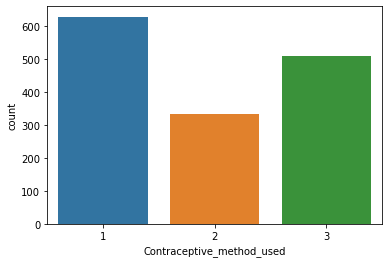

In [5]:
sns.countplot(x = df[target]);


**Balanceamento**

In [6]:
sample_max = df[df[target] == 2].shape[0]
df_aux = pd.DataFrame()
df_aux = pd.concat([df_aux, df.loc[df[(df["Contraceptive_method_used"]==2)].sample(n=sample_max, random_state = 1).index]])
df_aux = pd.concat([df_aux, df.loc[df[(df["Contraceptive_method_used"]==1)].sample(n=sample_max, random_state = 1).index]])
df_aux = pd.concat([df_aux, df.loc[df[(df["Contraceptive_method_used"]==3)].sample(n=sample_max, random_state = 1).index]])
df = df_aux

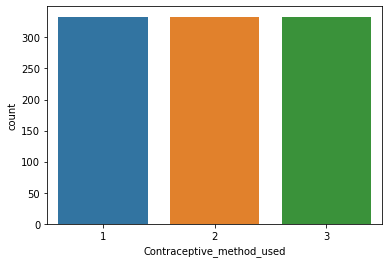

In [7]:
sns.countplot(x = df[target]);

**Normalização entre 0 - 1**

In [8]:
#normlizando 0 - 1
normalized_df = pd.DataFrame()
for i in df.columns:
    if i != target:
        normalized_df[i]=(df[i]-df[i].min())/(df[i].max()-df[i].min())
    else:
        normalized_df[i] = df[i]
        
normalized_df

,Wifes_age,Wifes_education,Husbands_education,Number_of_children_ever_born,Wifes_religion,Wifes_now_working%3F,Husbands_occupation,Standard-of-living_index,Media_exposure,Contraceptive_method_used
474,0.939394,1.000000,1.000000,0.5000,1.0,1.0,0.000000,1.000000,0.0,2
1256,0.939394,1.000000,1.000000,0.2500,0.0,1.0,0.333333,1.000000,0.0,2
595,0.787879,1.000000,1.000000,0.3125,1.0,1.0,0.000000,1.000000,0.0,2
607,0.515152,0.666667,1.000000,0.1875,0.0,1.0,0.333333,1.000000,0.0,2
1272,0.393939,1.000000,1.000000,0.1875,1.0,1.0,0.666667,0.333333,0.0,2
...,...,...,...,...,...,...,...,...,...,...
758,0.969697,0.666667,1.000000,0.1875,1.0,1.0,0.333333,0.666667,0.0,3
854,0.393939,0.666667,0.666667,0.3750,1.0,1.0,0.666667,0.666667,0.0,3
1424,0.181818,0.333333,1.000000,0.1250,1.0,1.0,0.666667,0.333333,0.0,3
1399,0.151515,0.666667,0.666667,0.0625,1.0,1.0,0.666667,0.000000,0.0,3


**EXPERIMENTO**

In [9]:
def classificador(model,X_train, X_test,y_train, y_test):
    
    
    if type(model).__name__ in ["SVC"] :
        y_t = label_binarize(y_train, classes=[1, 2, 3])
        y_te = label_binarize(y_test, classes=[1, 2,3])
        n_classes = y_t.shape[1]

        classifier = OneVsRestClassifier(model)

        aucs =[]
        y_score = classifier.fit(X_train, y_t).decision_function(X_test)
        for i in range(n_classes):
            fpr, tpr, AUC = roc_curve(y_te[:, i], y_score[:, i])
            aucs.append(auc(fpr,tpr))
        model.fit(X_train, y_train)
    else:
        model.fit(X_train, y_train)
        aucs =[roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'),
              roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'),
              roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')]

    
    
    new_row = {"ACC":accuracy_score(y_test, model.predict(X_test)),
               "F1":f1_score(y_test, model.predict(X_test), average='weighted'),
                  "AUC 1_T":aucs[0] ,
                  "AUC 2_T": aucs[1],
                  "AUC 3_T": aucs[2]}

    matrix_confusao = confusion_matrix(y_test,model.predict(X_test))



    return (new_row, matrix_confusao)

#Mudar para plotar a matriz de confusão média
def plotMatrizConfusao(matriz_list):
    sum = [[0,0,0],[0,0,0],[0,0,0]]
    for i in range(len(matriz_list)):
        sum = sum + matriz_list[i]
        
            
    sns.heatmap(sum/len(matriz_list), annot=True)
    

In [10]:
def otimizadorDeHype(name,X_train,y_train):
    cv = 3
    if name=='knn':
        limite_superior = 100
        limite_inferior = 1 
        limite = list(range(limite_inferior,limite_superior))
        #Parametros a serem escolhidos
        params = {'n_neighbors':limite, 'metric':['euclidean','manhattan']}
        #istanciando 
        gridS = GridSearchCV(KNeighborsClassifier(),params,cv=cv,n_jobs=-1,scoring='accuracy')
        #treinando o grid 
        grid_result = gridS.fit(X_train,y_train)
        return KNeighborsClassifier(metric = grid_result.best_params_['metric'],
                                    n_neighbors = grid_result.best_params_['n_neighbors']  )
    
    if name== 'mlp':
        mlp = MLPClassifier(max_iter=1000)

        params = {
            'hidden_layer_sizes': [(8,8),(316,16),(32,32), (32,64), (64,128)],
            'activation': ['tanh', 'relu'],
            'solver':['sgd','adam'],
            'alpha':[0.0001, 0.05],
            'learning_rate': ['constante','adaptive'],
        }

        gridS = GridSearchCV(mlp,params,n_jobs=-1,cv=cv,scoring='accuracy')
        
        grid_result = gridS.fit(X_train,y_train)
        return MLPClassifier(hidden_layer_sizes=grid_result.best_params_['hidden_layer_sizes'], 
                    activation=grid_result.best_params_['activation'], solver=grid_result.best_params_['solver'],
                    alpha=grid_result.best_params_['alpha'],
                    learning_rate=grid_result.best_params_['learning_rate'], max_iter=100000)
    if name == 'df':
        
        df = DecisionTreeClassifier()
        params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': list(range(2, 10)),
                  'max_depth':list(range(2, 15)),'criterion':["gini", "entropy"]}
        
        gridS = GridSearchCV(df,params,cv=cv,n_jobs=-1,scoring='accuracy')
        
        grid_result = gridS.fit(X_train,y_train)
        return DecisionTreeClassifier(max_leaf_nodes = grid_result.best_params_['max_leaf_nodes'],
                                      min_samples_split=grid_result.best_params_['min_samples_split'] ,
                                     max_depth=  grid_result.best_params_['max_depth'],
                                     criterion = grid_result.best_params_['criterion'])
    if name == "nb":
        
        nb = GaussianNB()
        
        params = {'var_smoothing': np.logspace(0,-9, num=100)}
        
        gridS = GridSearchCV(nb,params,cv=cv,n_jobs=-1,scoring='accuracy')
        
        grid_result = gridS.fit(X_train,y_train)
        return GaussianNB(var_smoothing=grid_result.best_params_['var_smoothing'])
    
    if name == "reg":
        
        reg = LogisticRegression(solver='liblinear')
        
        params = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
        
        gridS = GridSearchCV(reg,params,cv=cv,n_jobs=-1,scoring='accuracy')
        
        grid_result = gridS.fit(X_train,y_train)
        
        return LogisticRegression(solver='liblinear', penalty=grid_result.best_params_['penalty'])
    if name == "svm":
        
        svm = SVC()
        
        params = {"kernel": ['rbf'], 'C': list(range(1, 100))}
        
        gridS = GridSearchCV(svm ,params,cv=cv,n_jobs=-1,scoring='accuracy')
                                                                                       
        grid_result = gridS.fit(X_train,y_train)
        return SVC(kernel=grid_result.best_params_['kernel'], C=grid_result.best_params_['C'])

In [13]:
X = normalized_df.drop(target, axis=1).values
y = normalized_df[target].values
splits_kfold = 10

In [14]:

kf = StratifiedKFold(n_splits=splits_kfold)
kf.get_n_splits(X,y)

metrics = ["ACC","F1","AUC 1_T","AUC 2_T","AUC 3_T"]


matriz_knn = []
matriz_tree = []
matriz_mlp = []
matriz_nb = []
matriz_reg_log = []
matriz_svm = []

df_knn = pd.DataFrame(columns=metrics)
df_tree = pd.DataFrame(columns=metrics)
df_mlp = pd.DataFrame(columns=metrics)
df_nb = pd.DataFrame(columns=metrics)
df_reg_log = pd.DataFrame(columns=metrics)
df_svm = pd.DataFrame(columns=metrics)



for train_index, test_index in kf.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    
    
    
    model = otimizadorDeHype("knn",X_train,y_train)
    line, matrix = classificador(model,X_train, X_test,y_train, y_test)
    df_knn = df_knn.append(line, ignore_index=True)
    matriz_knn.append(matrix)
    
     
        
    model = otimizadorDeHype("df",X_train,y_train)
    line, matrix = classificador(model,X_train, X_test,y_train, y_test)
    df_tree = df_tree.append(line, ignore_index=True)
    matriz_tree.append(matrix)   
    
    
    
    model = otimizadorDeHype("mlp",X_train,y_train)
    line, matrix = classificador(model,X_train, X_test,y_train, y_test)
    df_mlp = df_mlp.append(line, ignore_index=True)
    matriz_mlp.append(matrix)  
    
    
    model = otimizadorDeHype("nb",X_train,y_train)
    line, matrix = classificador(model,X_train, X_test,y_train, y_test)
    df_nb = df_nb.append(line, ignore_index=True)
    matriz_nb.append(matrix) 
    
    
    model = otimizadorDeHype("reg",X_train,y_train)
    line, matrix = classificador(model,X_train, X_test,y_train, y_test)
    df_reg_log = df_reg_log.append(line, ignore_index=True)
    matriz_reg_log.append(matrix)
    
    model = otimizadorDeHype("svm",X_train,y_train)
    line, matrix = classificador(model,X_train, X_test,y_train, y_test)
    df_svm = df_svm.append(line, ignore_index=True)
    matriz_svm.append(matrix)
    
    

C:\Users\bhla\anaconda3\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bhla\anaconda3\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## Resultados

**Acurácia Geral**

In [15]:
df_result = pd.DataFrame()
metrica = "ACC"
df_result["KNN"] = df_knn[metrica]
df_result["NB"] = df_nb[metrica]
df_result["MLP"] = df_mlp[metrica]
df_result["TREE"] = df_tree[metrica]
df_result["REG"] = df_reg_log[metrica]
df_result["SVM"] = df_svm[metrica]
df_result.describe()

,KNN,NB,MLP,TREE,REG,SVM
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.495556,0.509556,0.544566,0.514556,0.525545,0.522596
std,0.040399,0.034918,0.058925,0.049741,0.035964,0.054572
min,0.430000,0.450000,0.430000,0.440000,0.470000,0.450000
25%,0.475000,0.492500,0.520000,0.482500,0.497500,0.480000
50%,0.495000,0.515000,0.540000,0.525000,0.530000,0.520000
75%,0.527500,0.537500,0.564242,0.545000,0.548864,0.572500
max,0.555556,0.555556,0.640000,0.600000,0.580000,0.595960


**F1-Score Geral**

In [16]:
df_result = pd.DataFrame()
metrica = "F1"
df_result["KNN"] = df_knn[metrica]
df_result["NB"] = df_nb[metrica]
df_result["MLP"] = df_mlp[metrica]
df_result["TREE"] = df_tree[metrica]
df_result["REG"] = df_reg_log[metrica]
df_result["SVM"] = df_svm[metrica]
df_result.describe()

,KNN,NB,MLP,TREE,REG,SVM
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.487377,0.501655,0.541658,0.512444,0.524243,0.519488
std,0.041503,0.034841,0.059891,0.050330,0.036420,0.055782
min,0.416828,0.440701,0.419777,0.431663,0.467818,0.445139
25%,0.469005,0.483015,0.515165,0.481576,0.498683,0.475421
50%,0.487656,0.509109,0.539052,0.521669,0.528295,0.519860
75%,0.516362,0.526611,0.562609,0.538007,0.549214,0.570152
max,0.551602,0.552096,0.633531,0.600707,0.575278,0.593259


**AUC Classe 1 contra Todo**

In [17]:
df_result = pd.DataFrame()
metrica = "AUC 1_T"
df_result["KNN"] = df_knn[metrica]
df_result["NB"] = df_nb[metrica]
df_result["MLP"] = df_mlp[metrica]
df_result["TREE"] = df_tree[metrica]
df_result["REG"] = df_reg_log[metrica]
df_result["SVM"] = df_svm[metrica]
df_result.describe()

,KNN,NB,MLP,TREE,REG,SVM
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.672950,0.680206,0.717018,0.685970,0.708388,0.739021
std,0.030669,0.035015,0.045342,0.037639,0.041195,0.053719
min,0.632212,0.600160,0.634500,0.634848,0.626355,0.666667
25%,0.646793,0.675332,0.698380,0.659960,0.688020,0.700249
50%,0.681912,0.686899,0.711627,0.682783,0.710886,0.735888
75%,0.695404,0.696690,0.735885,0.705647,0.730619,0.777307
max,0.718382,0.730513,0.794391,0.760113,0.779621,0.831750


**AUC Classe 2 contra Todo**

In [18]:
df_result = pd.DataFrame()
metrica = "AUC 2_T"
df_result["KNN"] = df_knn[metrica]
df_result["NB"] = df_nb[metrica]
df_result["MLP"] = df_mlp[metrica]
df_result["TREE"] = df_tree[metrica]
df_result["REG"] = df_reg_log[metrica]
df_result["SVM"] = df_svm[metrica]
df_result.describe()

,KNN,NB,MLP,TREE,REG,SVM
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.672950,0.680206,0.717018,0.685970,0.708388,0.671975
std,0.030669,0.035015,0.045342,0.037639,0.041195,0.053862
min,0.632212,0.600160,0.634500,0.634848,0.626355,0.586612
25%,0.646793,0.675332,0.698380,0.659960,0.688020,0.635165
50%,0.681912,0.686899,0.711627,0.682783,0.710886,0.670059
75%,0.695404,0.696690,0.735885,0.705647,0.730619,0.703789
max,0.718382,0.730513,0.794391,0.760113,0.779621,0.761141


**AUC Classe 3 contra Todo**

In [19]:
df_result = pd.DataFrame()
metrica = "AUC 3_T"
df_result["KNN"] = df_knn[metrica]
df_result["NB"] = df_nb[metrica]
df_result["MLP"] = df_mlp[metrica]
df_result["TREE"] = df_tree[metrica]
df_result["REG"] = df_reg_log[metrica]
df_result["SVM"] = df_svm[metrica]
df_result.describe()

,KNN,NB,MLP,TREE,REG,SVM
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.672950,0.680206,0.717018,0.685970,0.708388,0.675437
std,0.030669,0.035015,0.045342,0.037639,0.041195,0.030462
min,0.632212,0.600160,0.634500,0.634848,0.626355,0.622795
25%,0.646793,0.675332,0.698380,0.659960,0.688020,0.661506
50%,0.681912,0.686899,0.711627,0.682783,0.710886,0.677438
75%,0.695404,0.696690,0.735885,0.705647,0.730619,0.699796
max,0.718382,0.730513,0.794391,0.760113,0.779621,0.718360


**KNN Resultados**

Plot das matrizes de confusão

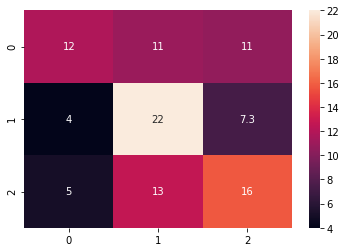

In [20]:
plotMatrizConfusao(matriz_knn)

**DT Resutaldos**

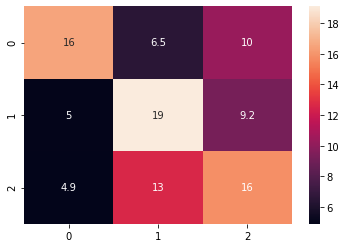

In [21]:
plotMatrizConfusao(matriz_tree)

**Multilayer Perceptron Resultados**

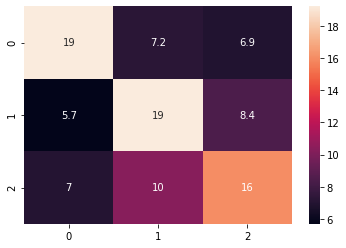

In [22]:
plotMatrizConfusao(matriz_mlp)

**Naive Bayes Resultados**

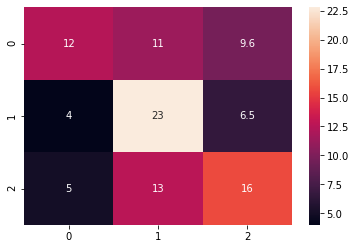

In [23]:
plotMatrizConfusao(matriz_nb)

**Regressão Logistica Resutaldos**

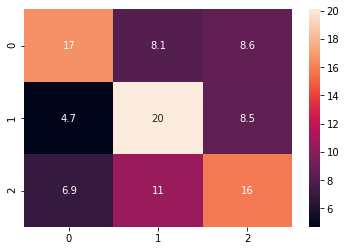

In [24]:
plotMatrizConfusao(matriz_reg_log)

**SVM**

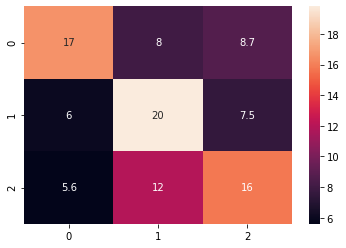

In [25]:
plotMatrizConfusao(matriz_svm)

## Teste estatisticos

**Shapiro-Wilk**

In [26]:
print("Teste de normalidade para as amostra das acurácias")
metrica = "ACC"
print(stats.shapiro(df_knn[metrica])[1])
print(stats.shapiro(df_nb[metrica])[1])
print(stats.shapiro(df_mlp[metrica])[1])
print(stats.shapiro(df_tree[metrica])[1])
print(stats.shapiro(df_reg_log[metrica])[1])
print(stats.shapiro(df_svm[metrica])[1])

Teste de normalidade para as amostra das acurácias
0.7554582357406616
0.5771583914756775
0.6511282324790955
0.8741683959960938
0.7228907346725464
0.3112579882144928


In [27]:
print("Teste de normalidade para as amostra dos F1-score")
metrica = "F1"
print(stats.shapiro(df_knn[metrica])[1])
print(stats.shapiro(df_nb[metrica])[1])
print(stats.shapiro(df_mlp[metrica])[1])
print(stats.shapiro(df_tree[metrica])[1])
print(stats.shapiro(df_reg_log[metrica])[1])
print(stats.shapiro(df_svm[metrica])[1])

Teste de normalidade para as amostra dos F1-score
0.9021260738372803
0.8178309202194214
0.5159100294113159
0.9233295917510986
0.6384531259536743
0.3132493793964386


In [28]:
print("Teste de normalidade para as amostra da AUC da classe 1 contra todos")
metrica = "AUC 1_T"
print(stats.shapiro(df_knn[metrica])[1])
print(stats.shapiro(df_nb[metrica])[1])
print(stats.shapiro(df_mlp[metrica])[1])
print(stats.shapiro(df_tree[metrica])[1])
print(stats.shapiro(df_reg_log[metrica])[1])
print(stats.shapiro(df_svm[metrica])[1])

Teste de normalidade para as amostra da AUC da classe 1 contra todos
0.17312927544116974
0.17891408503055573
0.6946260929107666
0.7980592846870422
0.9321586489677429
0.637532651424408


In [29]:
print("Teste de normalidade para as amostra da AUC da classe 2 contra todos")
metrica = "AUC 2_T"
print(stats.shapiro(df_knn[metrica])[1])
print(stats.shapiro(df_nb[metrica])[1])
print(stats.shapiro(df_mlp[metrica])[1])
print(stats.shapiro(df_tree[metrica])[1])
print(stats.shapiro(df_reg_log[metrica])[1])
print(stats.shapiro(df_svm[metrica])[1])

Teste de normalidade para as amostra da AUC da classe 2 contra todos
0.17312927544116974
0.17891408503055573
0.6946260929107666
0.7980592846870422
0.9321586489677429
0.9672139883041382


In [30]:
print("Teste de normalidade para as amostra da AUC da classe 3 contra todos")
metrica = "AUC 3_T"
print(stats.shapiro(df_knn[metrica])[1])
print(stats.shapiro(df_nb[metrica])[1])
print(stats.shapiro(df_mlp[metrica])[1])
print(stats.shapiro(df_tree[metrica])[1])
print(stats.shapiro(df_reg_log[metrica])[1])
print(stats.shapiro(df_svm[metrica])[1])

Teste de normalidade para as amostra da AUC da classe 3 contra todos
0.17312927544116974
0.17891408503055573
0.6946260929107666
0.7980592846870422
0.9321586489677429
0.7704039216041565


**Teste Estátistico kruskal**

In [31]:
print("Valores de p para acuracia ")
print(stats.kruskal(df_knn["ACC"], df_nb["ACC"],df_mlp["ACC"],df_tree["ACC"],df_reg_log["ACC"],df_svm["ACC"]))

Valores de p para acuracia 
KruskalResult(statistic=5.15023067244512, pvalue=0.3978224931609472)


In [32]:
print("Valores de p para F1 ")
print(stats.kruskal(df_knn["F1"], df_nb["F1"],df_mlp["F1"],df_tree["F1"],df_reg_log["F1"],df_svm["F1"]))

Valores de p para F1 
KruskalResult(statistic=7.078688524590177, pvalue=0.21485361859452418)


In [33]:
print("Valores de p para AUC 1 contra todos ")
print(stats.kruskal(df_knn["AUC 1_T"], df_nb["AUC 1_T"],df_mlp["AUC 1_T"],
                    df_tree["AUC 1_T"],df_reg_log["AUC 1_T"],df_svm["AUC 1_T"]))

Valores de p para AUC 1 contra todos 
KruskalResult(statistic=14.087213114754093, pvalue=0.015064815138892696)


In [34]:
print("Valores de p para AUC 2 contra todos ")
print(stats.kruskal(df_knn["AUC 2_T"], df_nb["AUC 2_T"],df_mlp["AUC 2_T"],
                    df_tree["AUC 2_T"],df_reg_log["AUC 2_T"],df_svm["AUC 2_T"]))

Valores de p para AUC 2 contra todos 
KruskalResult(statistic=9.604590163934432, pvalue=0.08724635059561381)


In [35]:
print("Valores de p para AUC 3 contra todos ")
print(stats.kruskal(df_knn["AUC 3_T"], df_nb["AUC 3_T"],df_mlp["AUC 3_T"],
                    df_tree["AUC 3_T"],df_reg_log["AUC 3_T"],df_svm["AUC 3_T"]))

Valores de p para AUC 3 contra todos 
KruskalResult(statistic=11.121967213114743, pvalue=0.04901464714590178)


**Teste Estátistico Dunn's**

In [36]:
print("Valores de p para acurácia: ")
print("KNN       NB       MLP       TREE       REG        SVM")
sp.posthoc_dunn([df_knn["ACC"], df_nb["ACC"],df_mlp["ACC"],df_tree["ACC"],df_reg_log["ACC"],df_svm["ACC"]] , p_adjust = 'bonferroni')


Valores de p para acurácia: 
KNN       NB       MLP       TREE       REG        SVM


,1,2,3,4,5,6
1,1.000000,1.0,0.527545,1.0,1.0,1.0
2,1.000000,1.0,1.000000,1.0,1.0,1.0
3,0.527545,1.0,1.000000,1.0,1.0,1.0
4,1.000000,1.0,1.000000,1.0,1.0,1.0
5,1.000000,1.0,1.000000,1.0,1.0,1.0
6,1.000000,1.0,1.000000,1.0,1.0,1.0


In [37]:
print("Valores de p para F1: ")
print("KNN       NB       MLP       TREE       REG        SVM")
sp.posthoc_dunn([df_knn["F1"], df_nb["F1"],df_mlp["F1"],df_tree["F1"],df_reg_log["F1"],df_svm["F1"]], p_adjust = 'bonferroni')

Valores de p para F1: 
KNN       NB       MLP       TREE       REG        SVM


,1,2,3,4,5,6
1,1.000000,1.0,0.258644,1.0,0.897251,1.0
2,1.000000,1.0,1.000000,1.0,1.000000,1.0
3,0.258644,1.0,1.000000,1.0,1.000000,1.0
4,1.000000,1.0,1.000000,1.0,1.000000,1.0
5,0.897251,1.0,1.000000,1.0,1.000000,1.0
6,1.000000,1.0,1.000000,1.0,1.000000,1.0


In [38]:
print("Valores de p para AUC 1 contra TODOS: ")
print("KNN       NB       MLP       TREE       REG        SVM")
sp.posthoc_dunn([df_knn["AUC 1_T"], df_nb["AUC 1_T"],df_mlp["AUC 1_T"],
                 df_tree["AUC 1_T"],df_reg_log["AUC 1_T"],df_svm["AUC 1_T"]], p_adjust = 'bonferroni')

Valores de p para AUC 1 contra TODOS: 
KNN       NB       MLP       TREE       REG        SVM


,1,2,3,4,5,6
1,1.000000,1.000000,0.258644,1.000000,0.729542,0.057122
2,1.000000,1.000000,0.707882,1.000000,1.000000,0.188022
3,0.258644,0.707882,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,0.375736
5,0.729542,1.000000,1.000000,1.000000,1.000000,1.000000
6,0.057122,0.188022,1.000000,0.375736,1.000000,1.000000


In [39]:
print("Valores de p para AUC 2 contra TODOS:: ")
print("KNN       NB       MLP       TREE       REG        SVM")
sp.posthoc_dunn([df_knn["AUC 2_T"], df_nb["AUC 2_T"],df_mlp["AUC 2_T"],
                 df_tree["AUC 2_T"],df_reg_log["AUC 2_T"],df_svm["AUC 2_T"]], p_adjust = 'bonferroni')

Valores de p para AUC 2 contra TODOS:: 
KNN       NB       MLP       TREE       REG        SVM


,1,2,3,4,5,6
1,1.000000,1.000000,0.317781,1.0,0.897251,1.000000
2,1.000000,1.000000,0.774532,1.0,1.000000,1.000000
3,0.317781,0.774532,1.000000,1.0,1.000000,0.388366
4,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
5,0.897251,1.000000,1.000000,1.0,1.000000,1.000000
6,1.000000,1.000000,0.388366,1.0,1.000000,1.000000


In [40]:
print("Valores de p para AUC 3 contra TODOS:: ")
print("KNN       NB       MLP       TREE       REG        SVM")
sp.posthoc_dunn([df_knn["AUC 3_T"], df_nb["AUC 3_T"],df_mlp["AUC 3_T"],
                 df_tree["AUC 3_T"],df_reg_log["AUC 3_T"],df_svm["AUC 3_T"]], p_adjust = 'bonferroni')

Valores de p para AUC 3 contra TODOS:: 
KNN       NB       MLP       TREE       REG        SVM


,1,2,3,4,5,6
1,1.00000,1.000000,0.224800,1.0,0.553320,1.000000
2,1.00000,1.000000,0.729542,1.0,1.000000,1.000000
3,0.22480,0.729542,1.000000,1.0,1.000000,0.241201
4,1.00000,1.000000,1.000000,1.0,1.000000,1.000000
5,0.55332,1.000000,1.000000,1.0,1.000000,0.588982
6,1.00000,1.000000,0.241201,1.0,0.588982,1.000000
